In [1]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image

# build the rocky_lift module and imports it
# the header and source files path is harcoded on the setup_rocky_lift.py and rocky_lift_module.pyx files!
#os.system("python setup_rocky_drag.py build_ext --inplace")
from libeng.multiphase import drag_laws

# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 9.0)

Fluidized Beds
=======

Fluid flowing up through a bed of solids can, above a minimum fluid velocity, make the solids behave like a "fluid" by supernd the particles on the flowing fluid. The minimum fludization velocity and the pressure drop across the bed are the most common values of interest in the design of such operations. Here is shown a compilation of engineering relevant items collected from references [1], [2] and [3].

Fluidized beds can be used with gases or liquids but they behave differently. When fludizing sand with water, the particles move further apart and their motion becomes more vigorous as the velocitu is increased, but the average bed density at a given velocity is the same in all sections of the bed (approximately homogeneous and uniform). This is called "particulate fluidization" and presents a large but uniform expansion of the bed at high velocities. At the limit of higher velocities the mixture behaves as a slurry. Beds of solids fluidized with gas usually exhibit what is called aggregative or bubbling fluidization. Most of the gas passes through the bed as bubbles or voids which are almost free of solids, and only a small fraction of the gas flows in the channel between the particles. The particles move erratically and are supported by the fluid, but in the spave between bubbles.


Particle Bed Pressure Drop
---------------------------

The pressure drop on the flow of a fluid through a bed of particles can be estimated using, for example, the Ergun (1958) equaiton. This empirical correlation is shown in Equation $\eqref{equation:ergun_superficial}$.

$$
\frac{\Delta p}{L} = 150 \frac{\alpha_{s}^{2} \mu_{f} U}{\alpha_{f}^{3} d_{s}^{2} \phi^{2}} + 1.75 \frac{\rho_{f} \alpha_{s} U^{2}}{\alpha_{f}^{3} d_{s} \phi}
\label{equation:ergun_superficial} \tag{1}
$$

Where $L$ is the bed height and $U$ is the fluid superficial velocity.


Minimum Fluidization Velocity
----------------------------

An equation for the minimum fluidization velocity can be obtained by setting the pressure drop across the bed equal to the weight of the bed per unit area of cross section, including the buoyancy, as shown in Equation $\eqref{equation:pressure_drop_weight}$.

$$
\Delta p = g \alpha_{s} \left ( {\rho_{s} - \rho_{f}} \right ) L
\label{equation:pressure_drop_weight} \tag{2}
$$

The Ergun (1958) equation, Equation $\eqref{equation:ergun_superficial}$, can be used to calculate the pressure drop based on the fluid superficial velocity and fluid and particle properties. Combining Equation $\eqref{equation:pressure_drop_weight}$ and Equation $\eqref{equation:ergun_superficial}$, for a given set of fluid and solids properties, we have an equation for the minimum fluidization velocity, given by Equation $\eqref{equation:minimum_fluidization_superficial}$.

$$
150 \frac{\alpha_{s}^{2} \mu_{f} U}{\alpha_{f}^{3} d_{s}^{2} \phi^{2}} + 1.75 \frac{\rho_{f} \alpha_{s} U^{2}}{\alpha_{f}^{3} d_{s} \phi} - g \alpha_{s} \left ( {\rho_{s} - \rho_{f}} \right ) = 0
\label{equation:minimum_fluidization_superficial} \tag{3}
$$

This equation must be solved for $U$ to find the minimum fluidization velocity ($U_{MF}$), at the minimum fluidization velocity the fluid volume fraction (often refered as porosity) is increased in relation to the initial bed fluid volume fraction, for roughly spherical particles the typical values are in the range between $0.40$ and $0.45$. In the case of very small particles (more specifically $Re_{t} < 1$, only the laminar flow term in the Ergun equation is significant and Equation $\eqref{equation:minimum_fluidization_superficial}$ becomes Equation $\eqref{equation:minimum_fluidization_superficial_simplified_laminar}$.

$$
U_{MF} \approx \frac{g \left ( {\rho_{s} - \rho_{f}} \right )}{150 \mu_{f}} \frac{\alpha_{f}^{3}}{1 - \alpha_{f}} d_{s}^{2} \phi^{2}, \quad \text{for} \ Re_{t} < 1
\label{equation:minimum_fluidization_superficial_simplified_laminar} \tag{4}
$$

In the other extreme, with very large particles ($Re_{t} > 10^{3}$), the laminar term of Ergun equation becomes negligible and a different simplified version of Equation $\eqref{equation:minimum_fluidization_superficial}$ appears as Equation $\eqref{equation:minimum_fluidization_superficial_simplified_inertial}$.

$$
U_{MF} \approx {\left [ {\frac{\phi d_{s} g \left ( {\rho_{s} - \rho_{f}} \right ) \alpha_{f}^{3}}{1.75 \rho_{f}}} \right ]}^{\frac{1}{2}}, \quad \text{for} \  Re_{t} > 10^{3}
\label{equation:minimum_fluidization_superficial_simplified_inertial} \tag{5}
$$

The particle terminal velocity Reynolds number ($Re_{t}$) is calculated using the particle terminal velocity and the Stokes law as in Equation $\eqref{equation:particle_terminal_re}$.

$$
Re_{t} = \frac{\rho_{f} u_{t} d_{s}}{\mu_{f}} = \frac{d_{s}^{3} g \rho_f \left ( {\rho_{s} - \rho_f} \right )}{18 \mu_{f}}
\label{equation:particle_terminal_re} \tag{6}
$$

Expansion of Fluidized Beds
----------------------------

As the flow rate of fluid is increased, the bed expands. The two types ("particulate fludization" or "bubbly fluidization") of fluidized beds expands in different ways. For the "particulate fluidization" case, as the particles tend to be uniformly distributed, it is expected that the Ergun equation, Equation $\eqref{equation:ergun_superficial}$, as well as the equation for the bed weight, Equation $\eqref{equation:pressure_drop_weight}$, are still valid. Then the combined expression, given by Equation $\eqref{equation:minimum_fluidization_superficial}$, can be used with the superficial velocity as the independent variable and the fluid volume fraction as the dependent variable to predict bed expansion.

For beds of large particles the trend is a little different and the expansion data was correlated by an empirical equation given by Equation $\eqref{equation:big_particle_expansion}$. The bed height can be calculated using Equation $\eqref{equation:big_particle_height}$, this equation relates the (current) bed height with the (current) fluid volume fraction and the fluid volume fraction and bed height at minimum fluidization velocity. The value of the exponent $m$ and the 3rd order polynomial fit are shown in the plot below.

$$
U = \alpha_f^{m}
\label{equation:big_particle_expansion} \tag{7}
$$

$$
L = L_{MF} \frac{1 - \alpha_{fMF}}{1 - \alpha_{f}}
\label{equation:big_particle_height} \tag{8}
$$

For the case of "bubbly fluidization" the expansion of the bed comes mainly from the space occupied by the gas bubbles, since the dense phase does not expand significantly with increasing total flow. The flow through the dense phase is assumed to be at $U_{MF}$ times the fraction of the bed occupied by the dense phase, the rest of the gas flow is carried by the bubbles. This is expressed by Equation $\eqref{equation:bubbly_velocity}$.

$$
U = f_{b} U_{b} + \left ( {1 - f_{b}} \right ) U_{MF}
\label{equation:bubbly_velocity} \tag{9}
$$

Since all solids are in the dense phase, the height of the bed can be related to the height in incipient fluidization as $L_{MF} = L \left ( {1 - f_{b}} \right )$, the final expression for the "bubbly fluidization" bed height is given by Equation $\eqref{equation:bubbly_velocity}$. The bubble velocity can be estimated using the empirical expression shown in Equation $\eqref{equation:bubble_velocity}$.

$$
\frac{L}{L_{MF}} = \frac{U_{b} - U_{MF}}{U_{b} - U}
\label{equation:bubbly_height} \tag{10}
$$

$$
U_{b} \approx 0.7 \sqrt{g d_{B}}
\label{equation:bubble_velocity} \tag{11}
$$

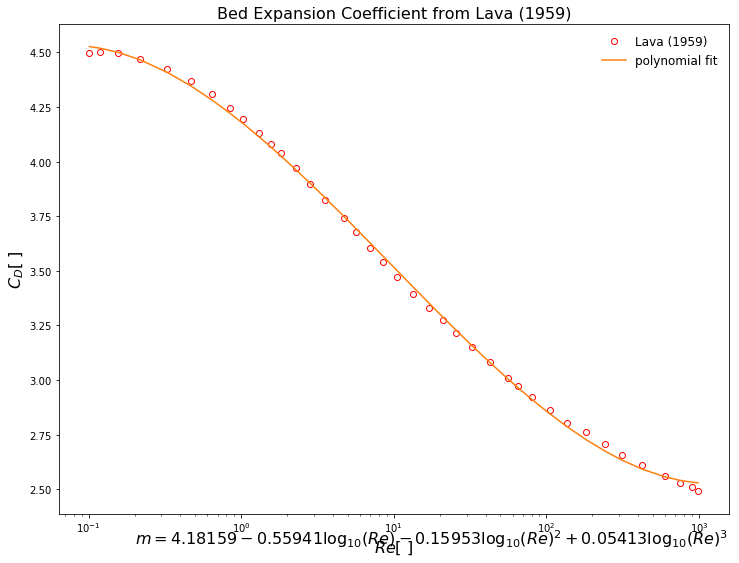

In [2]:
# loading the digitized data
Lava_data = open("Leva-bed-expansion.csv", 'r')
Re, m = np.loadtxt(Lava_data, delimiter = ',', skiprows = 1, unpack = True)    
Lava_data.close()

# adjust a 3rd order polynomial and generate the LaTeX string to be shown in the plot
m_polynomial = np.poly1d(np.polyfit(np.log10(Re), m, 3))
m_polynomial_fit = m_polynomial(np.log10(Re))
m_equation_string = "$m = {0[3]:-.5f} {0[2]:+.5f} x {0[1]:+.5f} x^{{2}} {0[0]:+.5f} x^{{3}}$".format(m_polynomial.coeffs)
m_equation_string = m_equation_string.replace("x", "\\log_{{10}} \\left ( {{Re}} \\right )")

plt.semilogx(Re, m, linestyle = "None", marker = 'o', markeredgecolor = "red", markerfacecolor = "none", label = "Lava (1959)")
plt.semilogx(Re, m_polynomial_fit, label = "polynomial fit")
plt.title("Bed Expansion Coefficient from Lava (1959)", fontsize = 16)
plt.xlabel("$Re [\ ]$", fontsize = 16)
plt.ylabel("$C_{D} [\ ]$", fontsize = 16)
plt.legend(fontsize = 12, frameon = False)
plt.text(0.2, 2.25, m_equation_string, fontsize = 16)
plt.show()

Fluidized bed case based on the paper of Alobaid & Epple (2013)
------------------------------------------------------------------

The paper of Alobaid & Epple (2013)<sup>[4]</sup> brings a complete set of particle/fluid data. This set of properties was used to define a test case of a simple fluidized bed (different from the one published in the paper) to test the correlation of the theoretical predictions and the simulation using the Rocky DEM - CFD coupling.

In the simulation the particles were injected inside the box and freely settled, thus the solids volume fraction was not perfectly homogeneous and uniform and its (average) value was not known a priori. Because of this the calculations of head loss and minimum fluidization velocity for the case were performed for 3 different fluid volume fraction values. The chosen values were typical values in the fluidization range ($0.35 \leq \alpha_{f} \leq 0.45$).

The plot below shows the curves of estimated pressure drop for 3 different values of fluid volume fraction varying with inlet superficial velocity. It also shows a dotted line with the pressure drop at minimum fluidization velocity for a continuous variation of fluid volume fraction. The objective of this line is to allow the visualization of the minimum fluidization velocity and compare it with the simulation results. The last line in this plot is the monitor of pressure at the gas injection from the simulation results. This curve shows that the pressure drop from the simulation follows the expected trends from the correlations, within the limits of typical fluidization and that the point of fluidization velocity matches the theoretical prediction.

The image below the plot shows the distribution of solids (solids volume fraction) on the bed at the initial time and around 7s later.

C:\Users\Lucilla\repositorio\libeng\multiphase\drag_laws.py:213: RuntimeWarning: divide by zero encountered in double_scalars
  C_D = 200. * (1.0 - alpha_f) / (alpha_f * phi * phi * Re) + 2.333333333333 / phi
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


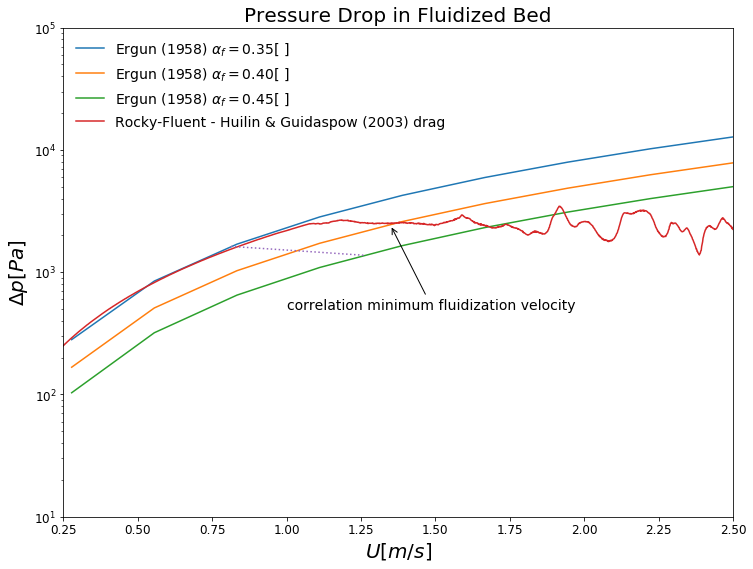

[ 0.35        0.36111111  0.37222222  0.38333333  0.39444444  0.40555556
  0.41666667  0.42777778  0.43888889  0.45      ]
[ 0.81334775  0.85998957  0.90739507  0.95554708  1.0044297   1.05402817
  1.10432874  1.15531855  1.20698554  1.25931838]


In [4]:
# calculating the minimum fludization velocity for the Alobaid case with injection over all bottom surfaces

# fluid properties
rho_f = 1.225 # [kg/m³]
mu_f = 1.7894e-05 # [Pa s]

# solid particles
rho_s = 1500.0 # [kg/m³]
d_s = 0.003 # [m]
phi = 1.0 # [ ]

# operating conditions
g = 9.81 # [m/s²]
h_0 = 0.17 # [m]
Re_t = d_s ** 3.0 * g * rho_f * (rho_s - rho_f) / (18.0 * mu_f)
#print("particle terminal Re =", Re_t)


# pressure drop variation with the injection superficial velocity
alpha_f_range = [0.35, 0.40, 0.45]
gas_velocity = np.linspace(start = 0.0, stop = 2.5, num = 10)
pressure_drop = np.zeros_like(gas_velocity)

for alpha_f in alpha_f_range:
    iterator = np.nditer(gas_velocity, flags=["f_index"])
    while not iterator.finished:
        Re = rho_f * gas_velocity[iterator.index] * d_s / (alpha_f * mu_f)
        C_D = drag_laws.Ergun1958(Re, alpha_f, phi)
        K_sf = 3.0 / 4.0 * (1.0 - alpha_f) * rho_f * C_D * gas_velocity[iterator.index] / (alpha_f * d_s)
        pressure_drop[iterator.index] = K_sf * gas_velocity[iterator.index] / (alpha_f ** 2.0) * h_0
        iterator.iternext()
    plt.semilogy(gas_velocity, pressure_drop, label = u"Ergun (1958) $\\alpha_{{f}} = {:.2f} [\ ]$".format(alpha_f))


# loading the simulation data
simulation_data = open("inlet-pressure-Alobaid.out", 'r')
gas_velocity_simulation, pressure_drop_simulation = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
simulation_data.close()
gas_velocity_simulation = gas_velocity_simulation / 2.0
plt.semilogy(gas_velocity_simulation, pressure_drop_simulation, label = u"Rocky-Fluent - Huilin & Guidaspow (2003) drag")



# minimum fluidization velocity for a range of fluid volume fraction
alpha_f = np.linspace(start = 0.35, stop = 0.45, num = 10)
fluidization_velocity = np.zeros_like(alpha_f)
pressure_drop_fluidization = np.zeros_like(alpha_f)

iterator = np.nditer(alpha_f, flags=["f_index"])
while not iterator.finished:
    alpha_f0 = alpha_f[iterator.index]
   
    def fluidization_velocity_residual(U):
        Re = rho_f * U * d_s / (alpha_f0 * mu_f)
        C_D = drag_laws.Ergun1958(Re, alpha_f0, phi)
        K_sf = 3.0 / 4.0 * (1.0 - alpha_f0) * rho_f * C_D * U / (alpha_f0 * d_s)
        residual = K_sf * U / alpha_f0 ** 2.0 -  g * (1.0 - alpha_f0) * (rho_s - rho_f)
        return residual
    fluidization_velocity[iterator.index] = fsolve(fluidization_velocity_residual, 1.0)[0]
    Re = rho_f * fluidization_velocity[iterator.index] * d_s / (alpha_f0 * mu_f)
    C_D = drag_laws.Ergun1958(Re, alpha_f0, phi)
    K_sf = 3.0 / 4.0 * (1.0 - alpha_f0) * rho_f * C_D * fluidization_velocity[iterator.index] / (alpha_f0 * d_s)
    pressure_drop_fluidization[iterator.index] = K_sf * fluidization_velocity[iterator.index] / (alpha_f0 ** 2.0) * h_0
    iterator.iternext()

annotation_string = u"correlation minimum fluidization velocity"

plt.semilogy(fluidization_velocity, pressure_drop_fluidization, linestyle = ":")
plt.title("Pressure Drop in Fluidized Bed", fontsize = 20)
plt.xlabel("$U [m/s]$", fontsize = 20)
plt.ylabel("$\\Delta p [Pa]$", fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 14, frameon = False, loc = 2)
plt.xlim(0.25, 2.5)     
plt.ylim(1e1, 1e5)  
plt.annotate(annotation_string, xy = (1.35, 2.4e3), xytext = (1.0, 5.0e+02), arrowprops=dict(arrowstyle="->"), fontsize = 14)
plt.show()

# shows the results image
Image(filename='fluidized-bed-Alobaid.png', width = 900)

print(alpha_f)
print(fluidization_velocity)

Fluidized bed case based on NETL SSCP-I (2013)
------------------------------------------------

A second fluidized bed test case was set based on the data from the NETL Small Scale Problem I<sup>[5]</sup>.

0.0010679575596816975
0.36393236469225887


C:\Users\Lucilla\repositorio\libeng\multiphase\drag_laws.py:213: RuntimeWarning: divide by zero encountered in double_scalars
  C_D = 200. * (1.0 - alpha_f) / (alpha_f * phi * phi * Re) + 2.333333333333 / phi
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


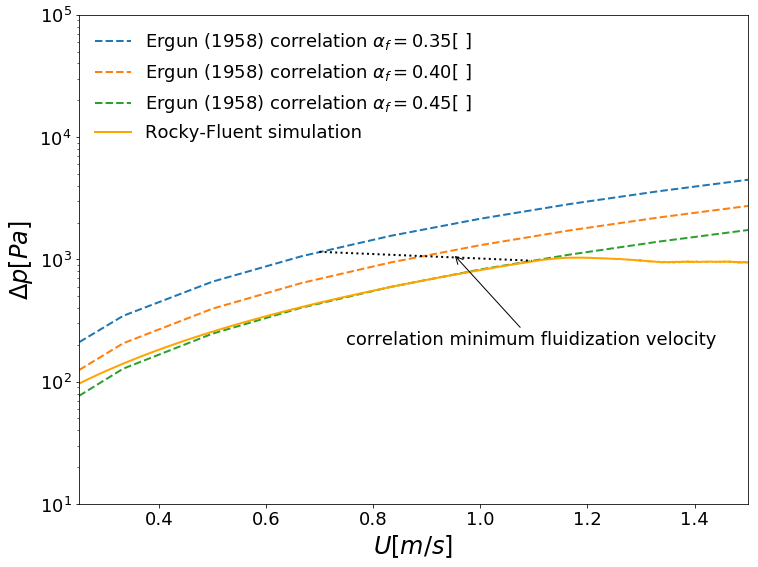

[[ 0.06667101  0.13344405  0.0239084  -0.11308205 -0.07480687 -0.22149693
   0.04075851  0.32019149  0.10279034 -0.27534034]]


In [19]:
# calculating the minimum fludization velocity for the NETL case SSCP-I

# fluid properties
rho_f = 1.2041 # [kg/m³]
mu_f = 1.90e-05 # [Pa s]

# solid particles
rho_s = 1131.0 # [kg/m³]
d_s = 3256.0e-6 # [m]
phi = 0.94 # [ ]

# operating conditions
g = 9.81 # [m/s²]
h_0 = 0.16 # [m]
Re_t = d_s ** 3.0 * g * rho_f * (rho_s - rho_f) / (18.0 * mu_f)
#print("particle terminal Re =", Re_t)

#estimating the initial bed void fraction
h = 0.1 # [m]
d = 0.073 #[m]
l = 0.23 #[m]

cube_volume = h*d*l
particle_mass_inside_cube = 1.20786 #[kg]
particle_volume_inside_cube = particle_mass_inside_cube/rho_s #[m3]
print(particle_volume_inside_cube)

particle_volume_fraction = particle_volume_inside_cube/cube_volume

bed_initial_void_fraction = 1 - particle_volume_fraction
print(bed_initial_void_fraction)



# pressure drop variation with the injection superficial velocity
alpha_f_range = [0.35, 0.40, 0.45]
gas_velocity = np.linspace(start = 0.0, stop = 1.5, num = 10)
pressure_drop = np.zeros_like(gas_velocity)

for alpha_f in alpha_f_range:
    iterator = np.nditer(gas_velocity, flags=["f_index"])
    while not iterator.finished:
        Re = rho_f * gas_velocity[iterator.index] * d_s / (alpha_f * mu_f)
        C_D = drag_laws.Ergun1958(Re, alpha_f, phi)
        K_sf = 3.0 / 4.0 * (1.0 - alpha_f) * rho_f * C_D * gas_velocity[iterator.index] / (alpha_f * d_s)
        pressure_drop[iterator.index] = K_sf * gas_velocity[iterator.index] / (alpha_f ** 2.0) * h_0
        iterator.iternext()
    plt.semilogy(gas_velocity, pressure_drop, linestyle = "--", linewidth = 2, label = u"Ergun (1958) correlation $\\alpha_{{f}} = {:.2f} [\ ]$".format(alpha_f))


# loading the simulation data
simulation_data = open("inlet-pressure_alpha11.out", 'r')
sandbox, timep1, pressure_drop_simulation = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("pressure_point1_alpha11.out", 'r')
sandbox, timep1, pressure_point1 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("pressure_point2_alpha11.out", 'r')
sandbox, timep2, pressure_point2 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("velocity-inlet_alpha11.out", 'r')
sandbox, timev1, gas_velocity_simulation = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()
plt.semilogy(gas_velocity_simulation, pressure_drop_simulation, color = "orange", linewidth = 2, label = u"Rocky-Fluent simulation")



# minimum fluidization velocity for a range of fluid volume fraction
alpha_f = np.linspace(start = 0.35, stop = 0.45, num = 10)
fluidization_velocity = np.zeros_like(alpha_f)
pressure_drop_fluidization = np.zeros_like(alpha_f)

iterator = np.nditer(alpha_f, flags=["f_index"])
while not iterator.finished:
    alpha_f0 = alpha_f[iterator.index]
   
    def fluidization_velocity_residual(U):
        Re = rho_f * U * d_s / (alpha_f0 * mu_f)
        C_D = drag_laws.Ergun1958(Re, alpha_f0, phi)
        K_sf = 3.0 / 4.0 * (1.0 - alpha_f0) * rho_f * C_D * U / (alpha_f0 * d_s)
        residual = K_sf * U / alpha_f0 ** 2.0 -  g * (1.0 - alpha_f0) * (rho_s - rho_f)
        return residual
    fluidization_velocity[iterator.index] = fsolve(fluidization_velocity_residual, 1.0)[0]
    Re = rho_f * fluidization_velocity[iterator.index] * d_s / (alpha_f0 * mu_f)
    C_D = drag_laws.Ergun1958(Re, alpha_f0, phi)
    K_sf = 3.0 / 4.0 * (1.0 - alpha_f0) * rho_f * C_D * fluidization_velocity[iterator.index] / (alpha_f0 * d_s)
    pressure_drop_fluidization[iterator.index] = K_sf * fluidization_velocity[iterator.index] / (alpha_f0 ** 2.0) * h_0
    iterator.iternext()

annotation_string = u"correlation minimum fluidization velocity"

plt.semilogy(fluidization_velocity, pressure_drop_fluidization, linestyle = ":", linewidth = 2, color = "black")
#plt.title("Pressure Drop in Fluidized Bed", fontsize = 24)
plt.xlabel("$U [m/s]$", fontsize = 24)
plt.ylabel("$\\Delta p [Pa]$", fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18, frameon = False, loc = 2)
plt.xlim(0.25, 1.5)     
plt.ylim(1e1, 1e5)  
plt.annotate(annotation_string, xy = (0.95, 1.1e3), xytext = (0.75, 2.0e+02), arrowprops=dict(arrowstyle="->"), fontsize = 18)
plt.show()

# velocity comparison
simulation_velocity_data = open("NETL-particle-velocity-huilin-guidaspow.csv", 'r')
velocity_data_huilin_guidaspow = np.loadtxt(simulation_velocity_data, delimiter = ',', skiprows = 1, unpack = False)
simulation_velocity_data.close()


velocity_averages_huilin_guidaspow = np.average(velocity_data_huilin_guidaspow[np.where(velocity_data_huilin_guidaspow[:, 0] >= 2.5), 1:], axis = 1)
print(velocity_averages_huilin_guidaspow)

References:
------------

1. MCCABE, Warren L.; SMITH, Julian C.; HARRIOTT, Peter. Unit Operations of Chemical Engineering. 5th edition. McGraw-Hill, Inc., 1993.
2. CROWE, Clayton T.; SCHWARZKOPF, John D.; SOMMERFELD, Martin; TSUJI, Yutaka. Multiphase Flows with Droplets and Particles. 2. edition. CRC Press, 2012.
3. GIDASPOW, Dimitri. Multiphase Flow and Fluidization: Continuum and Kinetic Theory Descriptions. Academic Press, 1993.
4. ALOBAID, Falah; EPPLE, Bernd. Improvement, validation and application of CFD/DEM model to dense gas-solid flow in a fluidized bed. Particuology, volume 11, pages 514-526, 2013.
5. NATIONAL ENERGY TECHNOLOGY LABORATORY. NETL Multiphase Flow Simulation Challenge Problem: Small Scale Problem I, https://mfix.netl.doe.gov/experimentation/challenge-problems/, 2013.

C:\Users\Lucilla\repositorio\libeng\multiphase\drag_laws.py:213: RuntimeWarning: divide by zero encountered in double_scalars
  C_D = 200. * (1.0 - alpha_f) / (alpha_f * phi * phi * Re) + 2.333333333333 / phi
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


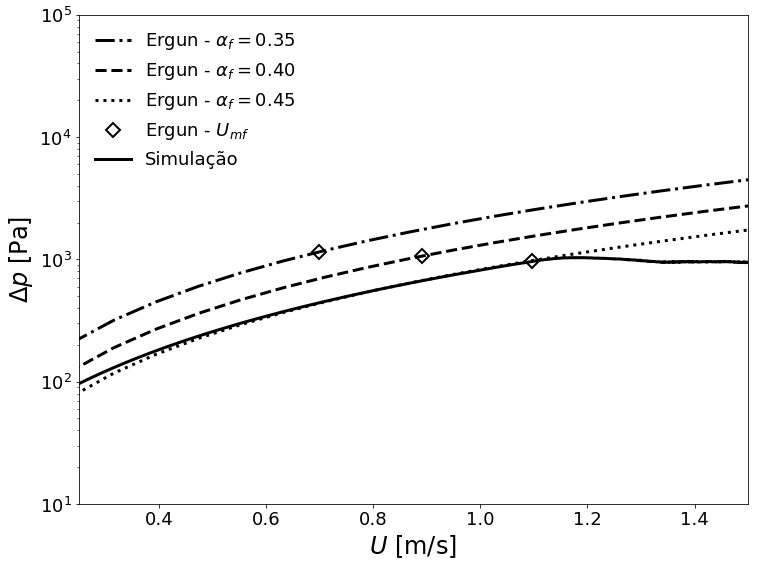

[[ 0.06667101  0.13344405  0.0239084  -0.11308205 -0.07480687 -0.22149693
   0.04075851  0.32019149  0.10279034 -0.27534034]]


In [16]:
# pressure drop variation with the injection superficial velocity
alpha_f_range = [0.35, 0.40, 0.45]
gas_velocity = np.linspace(start = 0.0, stop = 1.5, num = 20)
pressure_drop = np.zeros_like(gas_velocity)

linestyles = ["-.", "--", ":"]
lineindex = 0

for alpha_f in alpha_f_range:
    iterator = np.nditer(gas_velocity, flags=["f_index"])
    
    while not iterator.finished:
        Re = rho_f * gas_velocity[iterator.index] * d_s / (alpha_f * mu_f)
        C_D = drag_laws.Ergun1958(Re, alpha_f, phi)
        K_sf = 3.0 / 4.0 * (1.0 - alpha_f) * rho_f * C_D * gas_velocity[iterator.index] / (alpha_f * d_s)
        pressure_drop[iterator.index] = K_sf * gas_velocity[iterator.index] / (alpha_f ** 2.0) * h_0
        iterator.iternext()
    plt.semilogy(gas_velocity, pressure_drop, color = "black", linestyle = linestyles[lineindex], linewidth = 3, label = u"Ergun - $\\alpha_{{f}} = {:.2f} $".format(alpha_f))
    lineindex = lineindex + 1    

# loading the simulation data
#simulation_data = open("NETL-inlet-pressure.out", 'r')
#sandbox, pressure_drop_simulation = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
#simulation_data.close()

#simulation_data = open("NETL-velocity-inlet.out", 'r')
#sandbox, gas_velocity_simulation = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 2, unpack = True)
#simulation_data.close()



# minimum fluidization velocity for a range of fluid volume fraction
alpha_f = np.linspace(start = 0.35, stop = 0.45, num = 3)
#alpha_f = [0.35, 0.4]
fluidization_velocity = np.zeros_like(alpha_f)
pressure_drop_fluidization = np.zeros_like(alpha_f)



iterator = np.nditer(alpha_f, flags=["f_index"])
while not iterator.finished:
    alpha_f0 = alpha_f[iterator.index]
   
    def fluidization_velocity_residual(U):
        Re = rho_f * U * d_s / (alpha_f0 * mu_f)
        C_D = drag_laws.Ergun1958(Re, alpha_f0, phi)
        K_sf = 3.0 / 4.0 * (1.0 - alpha_f0) * rho_f * C_D * U / (alpha_f0 * d_s)
        residual = K_sf * U / alpha_f0 ** 2.0 -  g * (1.0 - alpha_f0) * (rho_s - rho_f)
        return residual
    fluidization_velocity[iterator.index] = fsolve(fluidization_velocity_residual, 1.0)[0]
    Re = rho_f * fluidization_velocity[iterator.index] * d_s / (alpha_f0 * mu_f)
    C_D = drag_laws.Ergun1958(Re, alpha_f0, phi)
    K_sf = 3.0 / 4.0 * (1.0 - alpha_f0) * rho_f * C_D * fluidization_velocity[iterator.index] / (alpha_f0 * d_s)
    pressure_drop_fluidization[iterator.index] = K_sf * fluidization_velocity[iterator.index] / (alpha_f0 ** 2.0) * h_0
    iterator.iternext()


plt.semilogy(fluidization_velocity, pressure_drop_fluidization, marker = "D", markersize = 10, markeredgewidth = 2, fillstyle ='none',  linestyle = "None", linewidth = 5, 
             color = "black", label = u"Ergun - $U_{mf}$")
plt.semilogy(gas_velocity_simulation, pressure_drop_simulation, color = "black",  linewidth = 3, label = u"Simulação")
#plt.title("Pressure Drop in Fluidized Bed", fontsize = 24)
plt.xlabel("$U $ [m/s]", fontsize = 24)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 18, frameon = False, loc = 2)
plt.xlim(0.25, 1.5)     
plt.ylim(1e1, 1e5)  
#plt.annotate(annotation_string, xy = (0.95, 1.1e3), xytext = (0.75, 2.0e+02), arrowprops=dict(arrowstyle="->"), fontsize = 18)


plt.show()

# velocity comparison
simulation_velocity_data = open("NETL-particle-velocity-huilin-guidaspow.csv", 'r')
velocity_data_huilin_guidaspow = np.loadtxt(simulation_velocity_data, delimiter = ',', skiprows = 1, unpack = False)
simulation_velocity_data.close()


velocity_averages_huilin_guidaspow = np.average(velocity_data_huilin_guidaspow[np.where(velocity_data_huilin_guidaspow[:, 0] >= 2.5), 1:], axis = 1)
print(velocity_averages_huilin_guidaspow)